In [9]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from codigos import extract_features, cross_validation, grid_search, preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
path = r"C:\Users\PC\Documents\Dataset_Multiclase\Modelo1"

## Vggnet16

In [6]:
x_train_vggnet, y_train_vggnet, x_test_vggnet, y_test_vggnet = extract_features.features_vgg16(path)

******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16
******************************************************************** 
Labels: ['cataratas' 'normal']
Labels encoded: [0 1]
6/6 [==============================] - 15s 2s/step
******************************************************************** 
Extracción de caracteristicas por medio de VGGNET16 finalizada
******************************************************************** 


In [15]:
models_cv = cross_validation.compare_models(x_train_vggnet, y_train_vggnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [16]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.905946,0.893880,0.922492,0.907644,0.964117
1,Naive Bayes,0.993082,1.000000,0.986171,0.993026,0.993085,0.774992,0.705625,0.963098,0.812953,0.776667
2,SVM,0.898987,0.960763,0.832096,0.891669,0.977765,0.865409,0.925685,0.797239,0.854321,0.960012
3,LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,0.907798,0.900567,0.918990,0.908788,0.966197
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.904145,0.905622,0.904242,0.904290,0.963268


## Resnet 

In [4]:
x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet = extract_features.features_resnet(path)

******************************************************************** 
Extracción de caracteristicas por medio de RESNET
******************************************************************** 
Labels: ['cataratas' 'normal']
Labels encoded: [0 1]
******************************************************************** 
Extracción de caracteristicas por medio de RESNET finalizada
******************************************************************** 


In [17]:
models_cv = cross_validation.compare_models(x_train_resnet, y_train_resnet, 5)

******************************************************************** 
Iniciando torneo de modelos con validación cruzada
******************************************************************** 
Modelo: Random Forest
Modelo: Naive Bayes
Modelo: SVM
Modelo: LGBM
Modelo: XGBoost
******************************************************************** 
Finalizando torneo de modelos con validación cruzada
******************************************************************** 


In [18]:
models_cv

,Model,Train Accuracy,Train precision,Train recall,Train f1,Train AUC-ROC,Test Accuracy,Test precision,Test recall,Test f1,Test AUC-ROC
0,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,0.905980,0.882094,0.952054,0.912780,0.968369
1,Naive Bayes,0.868541,0.818551,0.948336,0.878518,0.886751,0.843187,0.828191,0.929899,0.865631,0.870639
2,SVM,0.945571,0.922288,0.973246,0.947057,0.992080,0.911485,0.880185,0.963165,0.917869,0.979872
3,LGBM,1.000000,1.000000,1.000000,1.000000,1.000000,0.931770,0.915232,0.955623,0.934055,0.975499
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.915189,0.900618,0.937239,0.917543,0.969342


In [44]:
muestras_en_intervalo = 50
n_iter = 100

learning_ra_0 = list(set([float(x) for x in np.linspace(start = 0.001, stop = 0.8, num = muestras_en_intervalo)]))
estimadores_0 = list(set([int(x) for x in np.linspace(start = 10, stop = 200, num = muestras_en_intervalo)]))
profundidad_0 = list(set([int(x) for x in np.linspace(start = 11,  stop = 50, num = muestras_en_intervalo)]))
min_data_le_0 = list(set([int(x) for x in np.linspace(start = 18,  stop = 0.5*x_train_resnet.shape[0], num = muestras_en_intervalo)]))

parametros = {'learning_ra': learning_ra_0,
              'estimadores': estimadores_0,
              'profundidad': profundidad_0,
              'min_data_le': min_data_le_0
             }

In [45]:
ronda_0 = grid_search.train_models(x_train_resnet, y_train_resnet, x_test_resnet, y_test_resnet, n_iter, parametros)

******************************************************************** 
Iniciando busqueda de hiperparametros
******************************************************************** 
******************************************************************** 
Iteración: 0
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=260, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=260
[LightGBM] [Warning] min_data_in_leaf is set=271, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=271
[LightGBM] [Warning] min_data_in_leaf is set=219, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=219
[LightGBM] [Warning] min_data_in_leaf is set=116, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=116
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=271, m

[LightGBM] [Warning] min_data_in_leaf is set=255, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=255
[LightGBM] [Warning] min_data_in_leaf is set=167, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=167
******************************************************************** 
Iteración: 60
******************************************************************** 
[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245
[LightGBM] [Warning] min_data_in_leaf is set=69, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=69
[LightGBM] [Warning] min_data_in_leaf is set=59, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=59
[LightGBM] [Warning] min_data_in_leaf is set=260, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=260
[LightGBM] [Warning] min_data_in_leaf is set=193, min_child_samples=20 will be ignored. Current value: min

In [46]:
ronda_0

,parameters,modelo,auc_tr,accuracy_tr,precision_tr,recall_tr,f1_tr,Matriz_tr,auc_te,accuracy_te,precision_te,recall_te,f1_te,Matriz_te
0,"{'n_estimators': 91, 'max_depth': 18, 'min_dat...",Lighgbm,1.000000,1.000000,1.000000,1.00000,1.000000,"[[271, 0], [0, 271]]",0.973554,0.934066,0.924731,0.945055,0.934783,"[[84, 7], [5, 86]]"
1,"{'n_estimators': 165, 'max_depth': 26, 'min_sa...",RandomForest,0.983252,0.924354,0.891156,0.96679,0.927434,"[[239, 32], [9, 262]]",0.977297,0.912088,0.894737,0.934066,0.913978,"[[81, 10], [6, 85]]"
2,"{'n_estimators': 118, 'max_depth': 17, 'learni...",XGBoost,1.000000,1.000000,1.000000,1.00000,1.000000,"[[271, 0], [0, 271]]",0.980920,0.912088,0.912088,0.912088,0.912088,"[[83, 8], [8, 83]]"
3,"{'n_estimators': 118, 'max_depth': 45, 'min_da...",Lighgbm,0.500000,0.500000,0.000000,0.00000,0.000000,"[[271, 0], [271, 0]]",0.500000,0.500000,0.000000,0.000000,0.000000,"[[91, 0], [91, 0]]"
4,"{'n_estimators': 184, 'max_depth': 13, 'min_sa...",RandomForest,0.500000,0.500000,0.500000,1.00000,0.666667,"[[0, 271], [0, 271]]",0.500000,0.500000,0.500000,1.000000,0.666667,"[[0, 91], [0, 91]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,"{'n_estimators': 192, 'max_depth': 39, 'min_sa...",RandomForest,0.962991,0.898524,0.852941,0.96310,0.904679,"[[226, 45], [10, 261]]",0.969931,0.895604,0.860000,0.945055,0.900524,"[[77, 14], [5, 86]]"
296,"{'n_estimators': 157, 'max_depth': 28, 'learni...",XGBoost,1.000000,1.000000,1.000000,1.00000,1.000000,"[[271, 0], [0, 271]]",0.982732,0.917582,0.913043,0.923077,0.918033,"[[83, 8], [7, 84]]"
297,"{'n_estimators': 21, 'max_depth': 29, 'min_dat...",Lighgbm,1.000000,1.000000,1.000000,1.00000,1.000000,"[[271, 0], [0, 271]]",0.988407,0.939560,0.934783,0.945055,0.939891,"[[85, 6], [5, 86]]"
298,"{'n_estimators': 192, 'max_depth': 18, 'min_sa...",RandomForest,0.500000,0.500000,0.500000,1.00000,0.666667,"[[0, 271], [0, 271]]",0.500000,0.500000,0.500000,1.000000,0.666667,"[[0, 91], [0, 91]]"


In [47]:
ronda_0.to_excel("Modelo1/ronda_0.xlsx")

In [52]:
data = pd.read_excel("Modelo1/ronda_0.xlsx")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

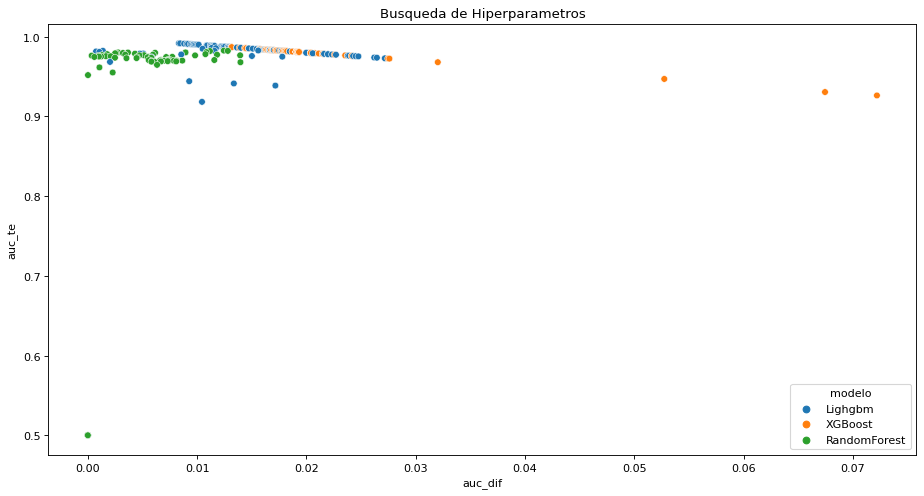

In [53]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data, x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

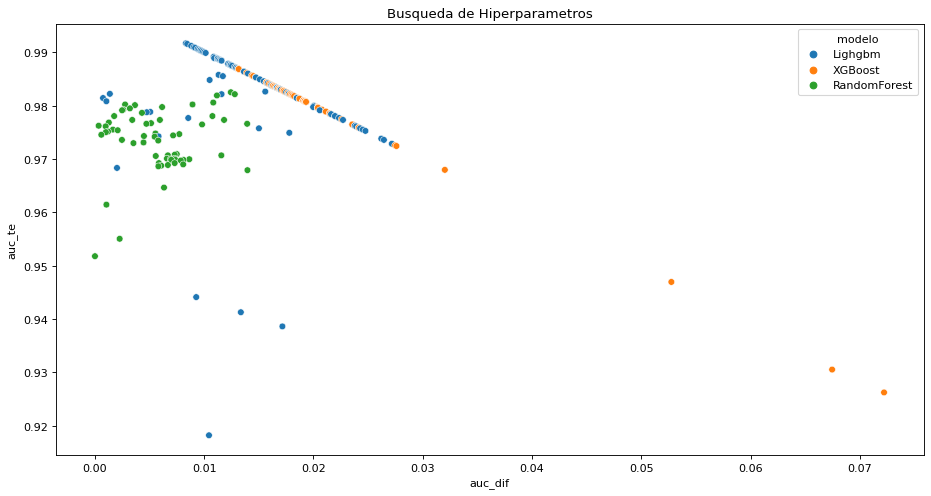

In [54]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data[data["auc_te"]>=0.9], x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")

[Text(0.5, 1.0, 'Busqueda de Hiperparametros')]

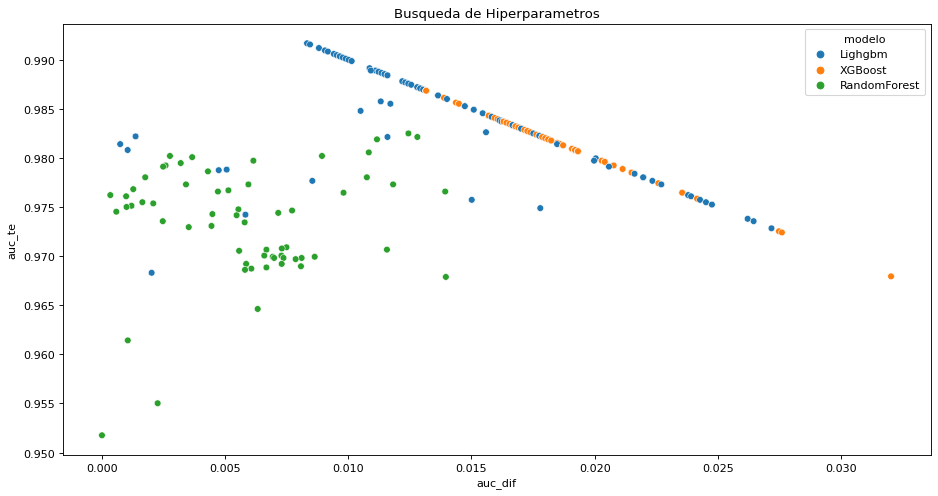

In [55]:
plt.figure(figsize=(14,7),dpi=80)
sns.scatterplot(data=data[data["auc_te"]>=0.95], x = "auc_dif", 
                y = "auc_te", 
                hue = "modelo").set(title = "Busqueda de Hiperparametros")